# Movies Analysis

**Imports**
- Pandas
- Matplotlib
- Movie Requests
- Seaborn
- Set Seaborn Theme

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import movie_requests as mrs
import seaborn as sns
sns.set_theme()

**Data**
- Request OMBd 'oscar_winners.csv'.
- Request OMBd 'python_winners.csv'.
- Combined the two csv files to a new 'movies.csv'.
- Import the new csv as a dataframe.

In [179]:
project_movies = mrs.res_omdb_data('oscar_winners.csv')
python_movies = mrs.res_omdb_data('python_winners.csv')
mrs.save_to_csv('movies.csv', project_movies + python_movies)
movies = pd.read_csv('data/movies.csv')

## Question 9.1
(Graph) What was the runtine for each movie?

**Strategy:**
- Sort the movies by runtime in descending order
- Make a list of the movie titles and runtimes


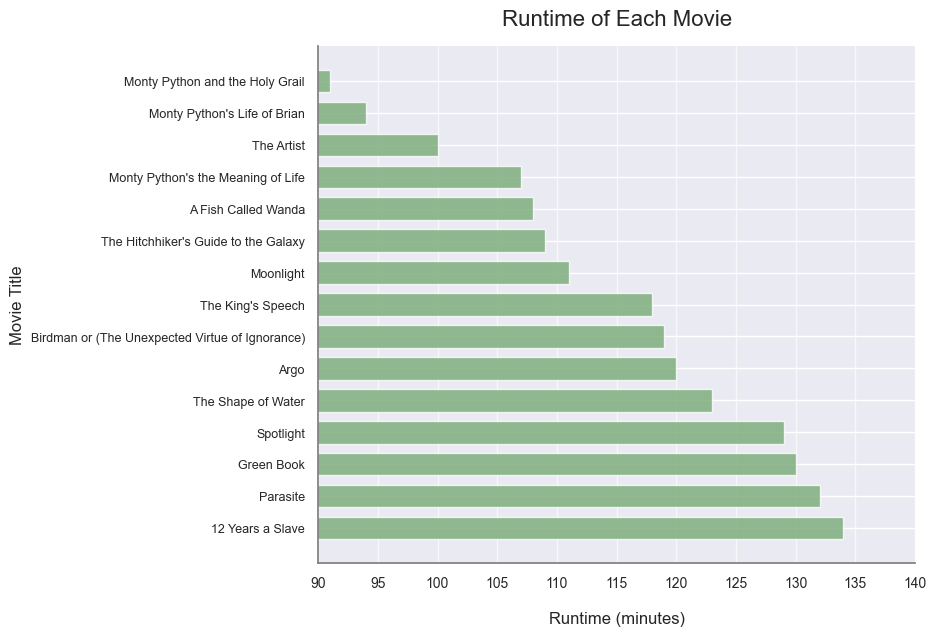

In [180]:
# Calculation
movies_sorted = movies.sort_values(by='Runtime', ascending=False)
sorted_titles = movies_sorted['Movie Title'].tolist()
sorted_runtimes = movies_sorted['Runtime'].tolist()


# Horizontal Bar Plot
plt.figure(figsize=(10, 7))
plt.barh(
    sorted_titles,
    sorted_runtimes,
    color='#77AA77',
    alpha=0.8,
    edgecolor='#ffffff',
    height=0.7
)
plt.xlabel('Runtime (minutes)', fontsize=12, labelpad=15)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Runtime of Each Movie', fontsize=16, pad=15)
plt.xticks(range(90, 141, 5), fontsize=10)
plt.yticks(fontsize=9)
plt.xlim(90, 140)
plt.grid(axis='x', linestyle='-', color='#ffffff', alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
plt.tight_layout(pad=2.5)
plt.show()

## Question 9.2
What movie had the longest runtime?

**Answer:**

Based on the horizontal bar plot above, the movie with the longest runtime is 12 Years a Slave, with a runtime of 134 minutes.

## Question 9.3
Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

**Strategy:**
- Calculate correlation coefficient

In [181]:
runtime_award_corr = movies['Runtime'].corr(movies['Award Wins'])
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.60


**Answer:**

Runtime and Award Wins have a
 positive linear correlation. This suggests that as one increases the other does.

## Question 9.4
(Graph) How many awards and nominations did each movie receive?

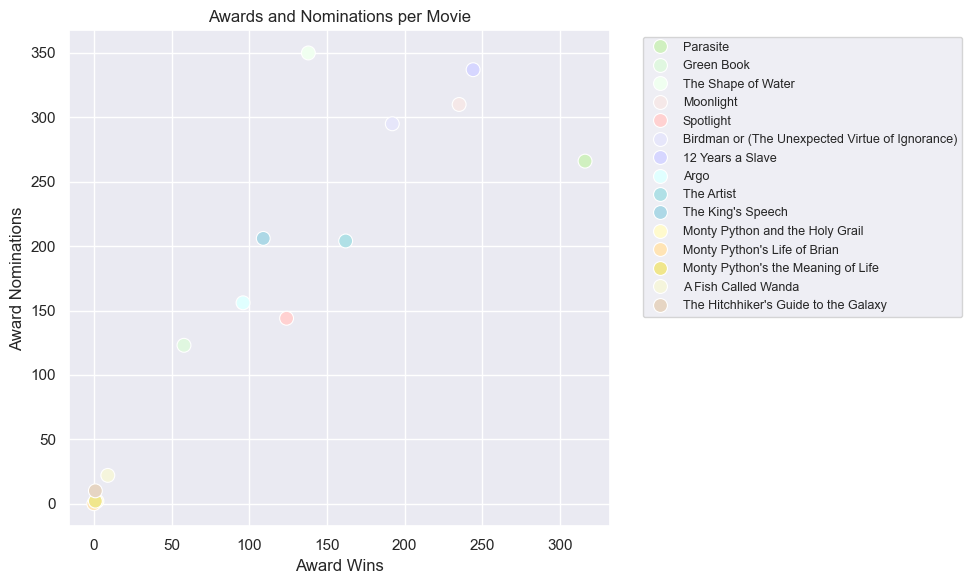

In [182]:
colors = [
    '#D0F0C0', '#E0F7E0', '#F0FFF0', '#F5E8E8', '#FFD1D1', '#E6E6FA',
    '#D6D6FF', '#E0FFFF', '#B0E0E6', '#ADD8E6', '#FFFACD', '#FFE4B5',
    '#F0E68C', '#F5F5DC', '#E6D5C3'
]

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Award Wins', y='Award Nominations', hue='Movie Title', 
                data=movies, palette=colors, s=100, edgecolor='#ffffff')
plt.title('Awards and Nominations per Movie')
plt.xlabel('Award Wins')
plt.ylabel('Award Nominations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

## Extra Credit Question 3.1
Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?

In [183]:
runtime_award_corr = movies['Box Office'].corr(movies['Award Wins']+movies['Award Nominations'])
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.19


## Extra Credit Question 3.2
Is there a relationship between box office earnings and movie runtimes?

In [184]:
runtime_award_corr = movies['Box Office'].corr(movies['Runtime'])
print(f"Correlation Coefficient: {runtime_award_corr:.2f}")

Correlation Coefficient: 0.48


## Extra Credit Question 3.3
(Graph) How much did each movie earn at the box office?

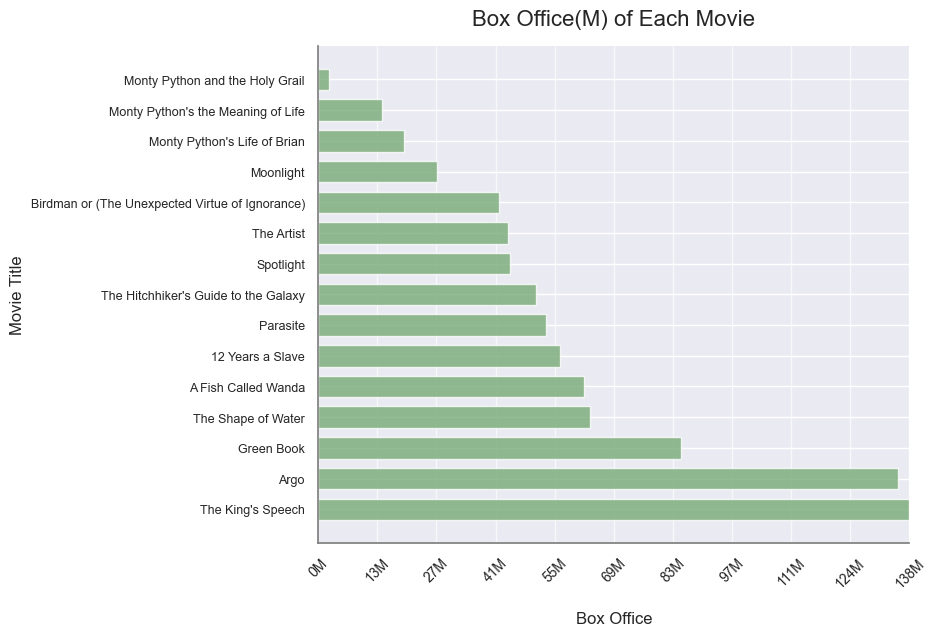

In [185]:
# Calculation
movies_sorted = movies.sort_values(by='Box Office', ascending=False)
sorted_titles = movies_sorted['Movie Title'].tolist()
sorted_box_office = movies_sorted['Box Office'].tolist()
max_value = max(sorted_box_office)
step_size = max_value // 10


# Horizontal Bar Plot
plt.figure(figsize=(10, 7))
plt.barh(
    sorted_titles,
    sorted_box_office,
    color='#77AA77',
    alpha=0.8,
    edgecolor='#ffffff',
    height=0.7
)
plt.xlabel('Box Office', fontsize=12, labelpad=15)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Box Office(M) of Each Movie', fontsize=16, pad=15)
plt.xticks(range(0, max_value + step_size, step_size), fontsize=10, rotation=45)
plt.yticks(fontsize=9)
plt.xlim(0, max_value)
plt.grid(axis='x', linestyle='-', color='#ffffff', alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.xaxis.set_major_formatter(lambda x, pos: f'{int(x/1_000_000)}M')
plt.tight_layout(pad=2.5)
plt.show()

## Extra Credit Question 3.4
(Graph) What is the total count of each genre present in the dataset? (How many times does fantasy, drama, adventure, etc. show up)

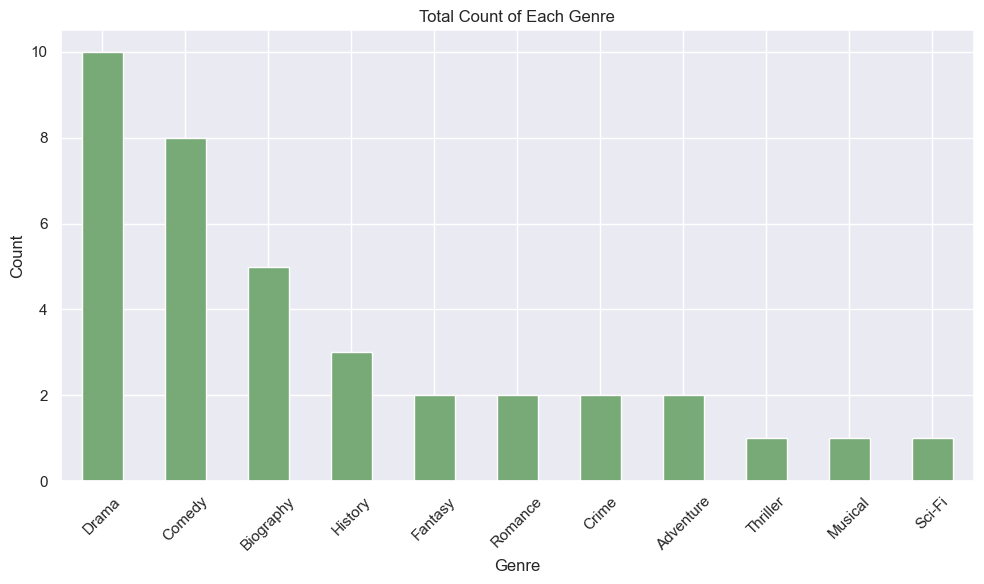

In [186]:
# Calculations
genre_counts = movies['Genre'].str.split(', ').explode().value_counts()


# Plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='#77AA77')
plt.title('Total Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()